# Entorno virtual

Hemos utilizado un entorno virtual de Python para nuestro proyecto con el fin de mantener un entorno aislado y controlado para las dependencias y paquetes utilizados. Esto nos ha permitido trabajar evitando conflictos entre versiones de paquetes y librerías.

Para implementar el entorno virtual, hemos utilizado la herramienta 'virtualenv' en la línea de comandos para crear y activar el entorno virtual. Luego, hemos instalado todas las bibliotecas y paquetes necesarios dentro del entorno virtual utilizando el archivo 'requirements.txt', que contiene una lista de dependencias con versiones específicas para garantizar la compatibilidad y reproducibilidad del proyecto.

Finalmente, al haber creado y trabajado dentro del entorno virtual, podemos garantizar que cualquier dependencia o paquete utilizado en nuestro proyecto no interfiera con otros proyectos o sistemas instalados en nuestra máquina además de funcionar en todos los ordenadores.

Creamos el entorno virtual con

In [1]:
# python3 -m venv env

Activimos el entorno virtual y instalamos el kernel de IPython para el entorno virtual en el sistema Jupyter. De esta manera, se puede usar el notebook de Jupyter utilizando el entorno virtual y trabajar con las bibliotecas y dependencias instaladas en el entorno virtual. El kernel se instala en el directorio de kernels de Jupyter, lo que permite que los notebooks creados con este kernel estén disponibles para todos los usuarios de la máquina.

In [2]:
# source /env/bin/activate
# python -m ipykernel install --user --name=env
# Installed kernelspec env in /root/.local/share/jupyter/kernels/env

Una vez que tengamos esto sólo hay que lanzar el comando 

    source /env/bin/activate 

antes de lanzar el jupyter notebook

# Librerias

Librerias para análisis de datos, cálculo numérico, manipulación de archivos y progreso de tarea.

    pandas: Biblioteca de análisis de datos
    numpy: Biblioteca de cálculo numérico y científico
        
    os: Módulo para interactuar con el sistema operativo.
    glob: Módulo para hacer coincidir archivos y directorios usando patrones.

    tqdm: Biblioteca para agregar barras de progreso a las iteraciones.
        
    gc: módulo que proporciona funciones para controlar el recolector de basura de Python, que es responsable de liberar la memoria utilizada por los objetos que ya no son necesarios.

    urllib.request: librería para realizar tareas relacionadas con la red, como abrir y leer URLs.
    
    

In [3]:
import pandas as pd
import numpy as np

import os
import glob

from tqdm import tqdm

import urllib.request

import gc

Librerías para deep learning, tratamiento de imágenes y visualización de datos

    - tensorflow: Plataforma para construir y entrenar modelos de aprendizaje automático.
    - ResNet50: Arquitectura de red neuronal pre-entrenada para clasificación de imágenes, importada desde Keras.
    - keras.layers: Módulo de Keras para construir capas en modelos de aprendizaje profundo. GlobalMaxPooling2D es una capa de reducción de dimensionalidad.   
    - load_model: Función para cargar modelos guardados en Keras.
    
    - sklearn: Biblioteca para aprendizaje automático en Python. NearestNeighbors es un algoritmo para búsqueda de vecinos cercanos y train_test_split se utiliza para dividir los datos.
    - numpy.linalg: Módulo para álgebra lineal en NumPy, con la función norm para calcular la norma de una matriz.
    - pickle: Módulo para serialización y deserialización de objetos Python.
    - PIL: Módulo para procesamiento de imágenes en Python, utilizando Image para abrir y manipular imágenes.
    - cv2: Módulo para procesamiento de imágenes y video en Python.
    - imgaug: biblioteca utilizada para aumentar imágenes para aplicaciones de aprendizaje automático y visión por computadora. 
    -GridSearchCV: es una función de la librería sklearn.model_selection que permite hacer una búsqueda exhaustiva de los mejores hiperparámetros para un modelo dado a través de validación cruzada.
    -KerasClassifier : es un wrapper de la librería scikit-learn para modelos de clasificación. Permiten utilizar los modelos de Keras como estimadores en las funciones de scikit-learn.
    -classification_report: es una función de la librería sklearn.metrics que genera un reporte de las métricas de evaluación para un modelo de clasificación, incluyendo precision, recall, f1-score y support para cada clase

    - matplotlib: Biblioteca para visualización de datos en Python. pyplot es el módulo para crear gráficos e imágenes.
    - rembg: Biblioteca para eliminar el fondo de imágenes en Python. bg es el módulo que proporciona la función para remover el fondo de la imagen.


In [98]:
# Librerías para deep learning
import tensorflow 
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import load_model

# Librerías de aprendizaje automático y procesamiento de imágenes
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from numpy.linalg import norm
from tensorflow.keras.models import load_model
import pickle
from PIL import Image
import cv2
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.metrics import classification_report

# Librerías de visualización
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Librerías para eliminar el fondo
from rembg.bg import remove


# Funciones

## Download files

Función para descargar la imagenes por categorías. 

Recibe como parámetros:

    - category : una categoría
    - dataframe df_bbdd_style_filter: que ha sido filtrado previamente para contener solamente las filas cuya categoría de articleType coincida con la categoría especificada en category, y otro 
    - dataframe df_bbdd_images que contiene los enlaces a las imágenes de la base de datos.

La función descarga las imágenes de la categoría especificada en category y las guarda en la carpeta BBDD que se encuentra en el directorio actual. Cada imagen se guarda con el nombre de su id correspondiente.

La función también imprime mensajes en la consola para informar sobre el progreso de la descarga de las imágenes.

In [5]:
def download_files(category, df_bbdd_style, df_bbdd_images, path):
  if not os.path.exists(path):
    os.mkdir(path)
  count_elements = 0
  print(f'Downloading {category} photos to: {path}')

  df_bbdd_style_filter = df_bbdd_style[df_bbdd_style.articleType == category]
  for index, row in df_bbdd_style_filter.iterrows():
    filename = f'{row.id}.jpg'
    path_file = f'{path}/{filename}'
    if not os.path.exists(path_file):
      link = df_bbdd_images[df_bbdd_images['filename'] == filename]['link'].values[0]
      if link != 'undefined':
#         urllib.request.urlretrieve(link, path_file)
        count_elements += 1
    
  print(f'{category} in total:{count_elements}')


## Remove background

Función que elimina el fondo de una foto, quedandose con el objeto principal. 

Toma como entrada:

    1- image_path: la ruta de una imagen 
    2- show: un parámetro opcional booleano que indica si se debe mostrar la imagen o no.

En primer lugar, se lee la imagen desde la ruta especificada usando OpenCV (cv2), que convierte la imagen de formato BGR a formato RGB usando la función cv2.cvtColor.

A continuación, la imagen se pasa a través de la función remove de la librería rembg para eliminar el fondo de la imagen.

Si el parámetro show es verdadero, la función muestra la imagen con plt.imshow y la devuelve, en caso contrario, devuelve la imagen sin mostrarla.

In [6]:
def remove_background(image_path, show=False):
  img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

  output = remove(img)
  if show == True:
    plt.imshow(img)
    plt.show()
  return img

## Read an image

Función que se encarga de leer una imagen desde un archivo y realizar una serie de operaciones de preprocesamiento.

Toma como entrada dos argumentos:

    1. filename: nombre del archivo de imagen que se va a leer
    2. img_shape: argumento opcional que establece el tamaño de la imagen de salida después de redimensionarla. Por defecto, el tamaño de la imagen es (224, 224).

Esta función utiliza la biblioteca TensorFlow para leer el archivo de imagen, decodificarlo en formato JPEG y convertirlo en una imagen de punto flotante. Si la imagen es de escala de grises, la función la convierte a RGB antes de realizar la redimensión.

Finalmente, la función devuelve la imagen preprocesada.

In [7]:
def read_image(filename, img_shape=(224, 224)):
    image = tensorflow.io.read_file(filename)
    image = tensorflow.io.decode_jpeg(image)
    # gray scale to rgb
    if len(image.shape) == 2 or image.shape[-1] == 1:
        image = tensorflow.image.grayscale_to_rgb(image)
    image = tensorflow.image.convert_image_dtype(image, tensorflow.float32)
    image = tensorflow.image.resize(image, img_shape)
    return image

## Plot accuracy

Función que traza un gráfico que muestra la precisión de un modelo en el conjunto de entrenamiento y el conjunto de validación a lo largo de las épocas. 

La función toma como entrada tres argumentos:

    1. epoch: el número de épocas de entrenamiento que se han realizado.
    2. history: un objeto que contiene la información de la precisión del modelo en cada época durante el entrenamiento. Este objeto suele ser devuelto por la función model.fit() de TensorFlow.
    3. file_name: una cadena de texto que indica el nombre del archivo en el que se guardará el gráfico generado.

Dentro de la función, se define el tamaño de la figura con la función figure de la librería plotter_lib. Se definen los rangos de épocas epochs_range y se traza la precisión del modelo en el conjunto de entrenamiento y el conjunto de validación en un gráfico con plotter_lib.plot. Se configura el rango de valores del eje Y del gráfico con plotter_lib.axis. Se añade un título y etiquetas de eje al gráfico con plotter_lib.title, plotter_lib.ylabel y plotter_lib.xlabel, respectivamente. Por último, se guarda el gráfico en un archivo.

In [8]:
def plot_model_accuracy(epoch, history, file_name):
    plotter_lib.figure(figsize=(8, 8))
    
    epochs_range= range(epoch)
    
    plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")
    plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
    
    plotter_lib.axis(ymin=0.4,ymax=0.75)
    plotter_lib.grid()
    
    plotter_lib.title('Model Accuracy')
    plotter_lib.ylabel('Accuracy')
    plotter_lib.xlabel('Epochs')
    plotter_lib.legend(['train', 'validation'])

    plotter_lib.savefig(file_name) 


## Extract features

Función que extrae las características de una imagen,
las procesa y normaliza .

La función toma tres argumentos:

    - image_path: la ruta del archivo de imagen que se va a procesar.
    - model: el modelo de aprendizaje automático pre-entrenado que se utilizará para extraer las características de la imagen.
    - show_image: una bandera booleana opcional para mostrar la imagen o no.

La función devuelve el vector de características normalizado de la imagen.

In [9]:
def extract_features(image_path, model):
    img = remove_background(image_path)
    plt.imshow(img)
    img = cv2.resize(img, (224,224))
    img = np.array(img)
    expand_img = np.expand_dims(img, axis=0)
    pre_img = preprocess_input(expand_img)
    result = model.predict(pre_img).flatten()
    normalized=result/norm(result)
    return normalized

## Create model

Función que crea un modelo de aprendizaje profundo de clasificación de imágenes utilizando un modelo pre-entrenado y que definiremos para poder usarla luego en la técnica de GridSearch para ajustar los hiperparámetros del modelo
Recibe como parámetros:

    - batch_size: el tamaño del lote 
    - epochs: número de epocas 
    - steps_per_epoch: y el número de pasos por época. 
    
Primero, crea la entrada del modelo y luego aplica la transformación de preprocesamiento (preprocess_input) a la entrada utilizando el modelo preentrenado (pretrained_model). A continuación, se aplica una capa de aplanamiento (Flatten), una capa de abandono (Dropout) y una capa de salida (Dense) con una función de activación Softmax. Por último, compila el modelo utilizando el optimizador Adam, la función de pérdida de entropía cruzada escasa y la métrica de precisión.

In [10]:
# Función para crear el modelo a partir de los hiperparámetros
def create_model(batch_size, epochs,  steps_per_epoch,dropout_rate=0.5,):
    inputs = tensorflow.keras.Input(shape=img_shape + (3, ), name='input')

    # pre-trained model
    x = preprocess_input(inputs)
    x = pretrained_model(x)

    flat = tensorflow.keras.layers.Flatten()(x)
    out = tensorflow.keras.layers.Dropout(dropout_rate)(flat)
    outputs = tensorflow.keras.layers.Dense(len(clothing_types), activation='softmax')(out)

    model = tensorflow.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


## Evaluate model

Función que obtiene el accuracy del modelo con los conjunto de test. 

También nos sacará un reporte de sus métricas, para ello utilizaremos la biblioteca Scikit-learn (sklearn) para evaluar el rendimiento de un modelo de aprendizaje profundo en un conjunto de datos.

Para obtener sus métricas primero obtendremos las predicciones en el conjunto de datos de prueba x_test con un predict. Luego aplicaremos el método argmax(1) a las predicciones para obtener el índice de la clase con la mayor probabilidad de ser la etiqueta de la imagen.

Finalmente, utilizarmos la función classification_report() de sklearn para generar un informe de clasificación que resume varias métricas de rendimiento, como la precisión, el recall, el F1-score y el soporte, para cada clase.

In [11]:
def evaluate_model(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print("Test accuracy for model {} : {}\n".format(i, test_accuracy))
    
    y_test_pred = model.predict(x_test).argmax(1)
    print(classification_report(y_test, y_test_pred))

## Nearest Neighbors - recommendation

Función que utiliza el algoritmo "Nearest Neighbors" para encontrar los objetos más cercanos
a "features" (características de la foto cargada) en "feature_list" (las características de todas las fotos cargadas de nuestra BBDD).
Se establece como parámetro que buscará los n artículos o fotografías más cercanos utilizando la distancia euclidiana como medida de cercanía.

Toma cuatro argumentos :

    - file_name: nombre de la foto de la que se quiere buscar parecidos.
    - modelo: modelo pre-entrenado que se usará para sacar la predicción
    - feature_list: una lista de características de una serie de objetos que se utilizarán para encontrar objetos similares al que se quiere recomendar.
    - n_neigh: numero de vecinos(fotos parecidas), que queremos obtener. Por defecto establecemos 4 vecinos.
    
La función ajusta el modelo de "neighbors" utilizando "feature_list" y luego utiliza el método "kneighbors" para encontrar los índices de los objetos más cercanos a "features".

Finalmente la función muestra las n fotografías más parecidas. 

In [12]:
def recommendation(file_name, model, feature_list,filenames, n_neigh=4):
    normalized = extract_features(file_name , model)
    neighbors = NearestNeighbors(n_neighbors=n_neigh, algorithm="brute", metric="euclidean")
    neighbors.fit(feature_list)
    distance, indices = neighbors.kneighbors([normalized])
    for file in indices[0][0:n_neigh]:
      img = cv2.cvtColor(cv2.imread(filenames[file]), cv2.COLOR_BGR2RGB)
      plt.imshow(img)
      plt.show()

## Features list BBDD

Función que extrae características de un conjunto de archivos utilizando el modelo pre-entrenado y la función extract_features definida previamente, guardando los resultados para su uso posterior.

Toma tres argumentos :

    - path: La ruta a la carpeta que contiene los archivos de los cuales queremos extraer características.
    - model: El modelo pre-entrenado para extraer características de cada archivo.
    - sufix_file: Una cadena de texto para agregar como sufijo a los archivos de salida.
    
La función devuelve una lista de características (feature_list) y una lista de nombres de archivos (filenames) y las guarda en objetos pickle.

In [13]:
def get_features_BBDD(path, model, sufix_file):
    filenames = [ ]
    feature_list=[]

    for file in os.listdir(path):
        filenames.append(os.path.join(path ,file))
    for file in tqdm(filenames):
       feature_list.append(extract_features(file, model))
    pickle.dump(feature_list, open(f'featurevector_{sufix_file}.pkl','wb'))
    pickle.dump(filenames, open(f'filenames_{sufix_file}.pkl','wb'))
    return filenames, feature_list

## Predict Probabilities

Función que obtiene la probabilidad de que una prenda pertenezca a una prenda u otra

Toma como argumentos:

    - image_path: ruta de imagen
    - model: un modelo de clasificación
    - class_names: una lista de nombres de clases
    - image_size: tamaño de imagen.

La función imprime una lista de las probabilidades y determina la clase predicha utilizando esta información para mostrar la imagen y el tipo de prenda, que incluye la clase predicha y su probabilidad. Finalmente, la función muestra la imagen y la predicción.

In [14]:
def predict_plot(image_path, model, class_names, image_size):
    image = read_image(image_path, image_size[:2])
    list_prob = model.predict(np.expand_dims(image, 0))
    prob = -np.sort(-list_prob)[0][0]
    dict_prob = {}
    i = 0
    print("\n ---- LIST PROBABILITIES ----\n")
    for key in class_names:
        dict_prob[list_prob[0][i]] = key
        print(f'{key} : {list_prob[0][i]}')
        i += 1
        
    pred_class = dict_prob.get(prob)
    plt.imshow(image)
    plt.title(
        'Predicted: {0}, prob: {1:.2f}'
        .format(pred_class, prob))
    plt.axis('off')
    plt.show()

# Variables constantes

In [15]:
BBDD_PATH = "Dataset_BBDD"

In [16]:
pd.options.mode.chained_assignment = None

# Base de datos

Obtenemos la base de datos de kaggle [Fashion Product Images Dataset](https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset). 

Este dataset es un conjunto de datos de 44.459 productos de moda que se utilizan en el comercio electrónico. Cada producto está identificado por un ID único y se proporcionan dos csv con información sobre las diferentes imagenes:

    - styles.csv: Con información de la imagenes
    - images.csv: Con los enlaces para descargar las imagenes.

Como es una base de datos muy pesada y no nos interesa todos los articulos, filtraremos aquellos que consideraremos utiles para nuestro proyecto. Para ello utilizaremos la función definida arriba de descargar.

## Lectura csv y filtrado de las categorías

In [21]:
df_images = pd.read_csv('images.csv',  on_bad_lines='skip', engine="python")
df_styles = pd.read_csv('styles.csv',  on_bad_lines='skip', engine="python")
print(len(df_styles))

44424


In [22]:
df_images.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [23]:
df_styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [24]:
df_styles['masterCategory'].value_counts()

Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

Nos quedamos unicamente con los artículos de ropa que son los que nos interessan en este caso

In [25]:
df_styles_master = df_styles[(df_styles['masterCategory'] == 'Apparel')] 

In [26]:
df_styles_master['subCategory'].value_counts()

Topwear                     15402
Bottomwear                   2694
Innerwear                    1808
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Apparel Set                   106
Socks                          12
Name: subCategory, dtype: int64

Volvemos ha hacer un filtro y nos quedamos de momento con las partes de arriba y de abajo

In [27]:
df_filtered = df_styles_master[(df_styles_master['subCategory'] == 'Topwear') | (df_styles_master['subCategory'] == 'Bottomwear') ]

In [28]:
df_filtered['articleType'].value_counts()

Tshirts               7066
Shirts                3217
Kurtas                1844
Tops                  1762
Jeans                  609
Shorts                 545
Trousers               530
Track Pants            304
Sweatshirts            285
Sweaters               277
Jackets                258
Kurtis                 234
Tunics                 229
Leggings               177
Capris                 175
Skirts                 128
Dupatta                116
Suspenders              40
Patiala                 38
Jeggings                34
Stockings               32
Salwar                  32
Churidar                30
Tracksuits              29
Rain Jacket             18
Waistcoat               15
Swimwear                13
Rompers                 12
Tights                   9
Blazers                  8
Salwar and Dupatta       7
Shrug                    6
Nehru Jackets            5
Lehenga Choli            4
Belts                    3
Dresses                  2
Rain Trousers            2
S

In [29]:
df_filtered.loc[df_filtered['articleType'] == 'Leggings', 'articleType'] = 'Track Pants'
df_filtered.loc[df_filtered['articleType'] == 'Jeggings', 'articleType'] = 'Track Pants'
df_filtered.loc[df_filtered['articleType'] == 'Sweatshirts', 'articleType'] = 'Sweaters'

df_filtered = df_filtered[df_filtered['articleType'] != 'Kurtas']

In [30]:
df_filtered['articleType'].value_counts().head(10)

Tshirts        7066
Shirts         3217
Tops           1762
Jeans           609
Sweaters        562
Shorts          545
Trousers        530
Track Pants     515
Jackets         258
Kurtis          234
Name: articleType, dtype: int64

Vemos que tenemos un dataset muy desbalanceado por lo que decidimos reducir aquellas categorías que tienen un mayor número de articulos y descartar aquellas que tienen muy pocos fotografías.
Finalmente nos quedamos con un máximo de 650 artículos en las prendas de tipo (Tshirts, Shirts, Tops). Para ello calculamos el número máximo de articulos que queremos por categorías y filtramos esas columnas agrupando y filtrando por el número de muestras. 
A continuación nos quedamos con todas aquellas columnas que tengan más de 450 elementos. Para ello guardamos el número por categoría en una variable y filtramos el dataset para aquellos que son mayores de 450.

In [31]:
n = 650
df_filtered = df_filtered.groupby('articleType', group_keys=False).apply(lambda x: x.sample(n=n) if x.name in ['Tshirts', 'Shirts', 'Tops'] else x)

In [32]:
counts = df_filtered['articleType'].value_counts()
df_filtered = df_filtered[df_filtered['articleType'].isin(counts[counts > 450].index)]

### Categorías finales

In [33]:
df_filtered['articleType'].value_counts()

Shirts         650
Tops           650
Tshirts        650
Jeans          609
Sweaters       562
Shorts         545
Trousers       530
Track Pants    515
Name: articleType, dtype: int64

## Descarga de las images

Una vez filtrados los datos nos descargamos únicamente aquellos que nos interesa.

In [74]:
for category in df_filtered['articleType'].unique():
    download_files(category, df_filtered, df_images, BBDD_PATH)

Jeans in total:608
Shirts in total:650
Shorts in total:545
Sweaters in total:561
Tops in total:650
Track Pants in total:515
Trousers in total:530
Tshirts in total:650


Leemos los ficheros que tenemos en nuestra base de datos y calculamos el total

In [34]:
list_files_dataset = glob.glob(os.path.join(BBDD_PATH, '*'))
print(f'Number of articles in total {len(list_files_dataset)}')

Number of articles in total 15990


Observamos el tipo de ficheros descargados

In [35]:
list_files_dataset[0]

'Dataset_BBDD/9733.jpg'

Obtenemos los id de los ficheros que tenemos en nuestra base de datos y filtramos nuestro dataset por si algunas e las fotografías seleccionadas previamente no se han descargado correctamente

In [36]:
list_of_ids = [int(os.path.basename(x).split('.')[0]) for x in list_files_dataset]

In [37]:
df_filtered = df_filtered[df_filtered['id'].isin(list_of_ids)]
print(len(df_filtered))

4708


Comprobamos que tenemos los mismos ficheros en el dataframe como en nuestra carpeta con los ficheros, quedandonos unicamente con aquellos que esten en ambos

In [38]:
list_ids = df_filtered['id'].unique()
list_names_files = [os.path.join(BBDD_PATH,f'{id}.jpg') for id in list_ids]
print(len(list_names_files))
list_files_dataset = [file for file in list_files_dataset if file in list_names_files]
print(len(list_files_dataset))

4708
4708


# Modelo

## Create labels

Generamos un diccionario que asocia cada ID de imagen a una etiqueta numérica basada en el tipo de prenda de vestir en la imagen. Para ello creamos un conjunto de IDs de imagenes a partir del nombre de los archivos. A continuación extraemos una lista de los tipos de prenda de vestir y asignamos una etiqueta numérica única a cada una. Finalmente iteramos a través de cada fila en el dataframe y agregamos una entrada al diccionario id2label para cada imagen.

In [39]:
image_ids = {name.split('.')[0] for name in os.listdir(BBDD_PATH)}

clothing_types = df_filtered['articleType'].unique().tolist()
type_to_int = {clothing_type: i for i, clothing_type in enumerate(clothing_types)}

id2label = {}

for i, row in df_filtered.iterrows():
    _id = str(row['id'])
    if _id in image_ids:
        clothing_type = row['articleType']
        label = type_to_int[clothing_type]
        id2label[_id] = label

print("Total de articulos: ", len(id2label))

Total de articulos:  4708


Para generar las listas de etiquetas e imágenes, primero se crearán dos listas vacías llamadas "labels" e "images". En la lista "labels" se irán almacenando los identificadores de cada imagen, mientras que en la lista "images" se irán leyendo y almacenando las imágenes correspondientes.

Luego, ambas listas se convertirán en matrices numpy utilizando np.array(). De esta manera, se podrán procesar y manipular de forma más eficiente los datos en la memoria.

En resumen, este fragmento de código realiza la lectura y almacenamiento de imágenes y sus correspondientes etiquetas en forma de matrices numpy para su posterior procesamiento.

In [83]:
gc.collect()
# Lista para guardar las imágenes
images = []

# Lista para guardar las labels
labels = []
img_shape = (224, 224)
for filename in tqdm(os.listdir(BBDD_PATH)):
    file_path = os.path.join(BBDD_PATH, filename)
    
    # Revisamos si existe el fichero
    if os.path.isfile(file_path): 
        # Obtenemos su id
        image_id = filename.split('.')[0]
        if image_id in id2label:
            label = id2label[image_id]
            # Leemos la imgen
            image = read_image(file_path, img_shape)
            images.append(image.numpy())
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

images.shape

100%|█████████████████████████████████████| 15990/15990 [06:43<00:00, 39.64it/s]


(4709, 224, 224, 3)

In [84]:
from collections import Counter
Counter(labels.tolist())

Counter({3: 561, 1: 650, 7: 650, 5: 515, 6: 530, 4: 650, 0: 608, 2: 545})

In [85]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=0)
print(x_train.shape, x_val.shape, x_test.shape)

(3401, 224, 224, 3) (601, 224, 224, 3) (707, 224, 224, 3)


# Código modelo 

Nos decidimos por usar un modelo pre-entrenado, como es el ResNet50 en lugar de crear un modelo completamente nuevo desde cero, ya que entrenar un modelo de aprendizaje profundo desde cero requiere una gran cantidad de datos de entrenamiento etiquetados y en este caso no tenemos tantos como para llegar a obtener el rendimiento deseado. Además que entrenarlo desde 0 puede llevar mucho tiempo, especialmente si se requiere un alto rendimiento y al utilizar un modelo pre-entrenado como punto de partida, creemos que podemos ahorrar tiempo de entrenamiento, ya que tiene un buen desempeño en una tarea relacionada. 
Para ello utilizaremos la técnica de la transferencia de aprendizaje, que se refiere a la idea de que el conocimiento aprendido en una tarea puede ser transferido a otra tarea relacionada.

Nos decidimos por el modelo pre-entrenado **ResNet50** un modelo de red neuronal convolucional (CNN) por diversas razones:

    - Rendimiento: ResNet50 ha demostrado un rendimiento excepcional en una amplia variedad de tareas de visión por computadora, incluyendo clasificación de imágenes, detección de objetos y segmentación semántica. Este modelo ha ganado varias competiciones de aprendizaje profundo y es uno de los modelos más utilizados en la comunidad de investigación.

    -Profundidad: ResNet50 es una red neuronal muy profunda con 50 capas. A pesar de su profundidad, ResNet50 evita el problema de degradación de la precisión que afecta a otras redes neuronales profundas. La degradación de la precisión se refiere al fenómeno en el que agregar capas adicionales a una red neuronal no mejora la precisión de la red y, de hecho, puede empeorarla.
    
        -Pre-entrenamiento: ResNet50 ha sido pre-entrenado en grandes conjuntos de datos, lo que significa que ya ha aprendido características generales útiles en una amplia variedad de imágenes. Al utilizar ResNet50 como punto de partida, podemos aprovechar este conocimiento pre-entrenado y ajustar el modelo para tareas específicas de visión artificial, lo que a menudo resulta en un mejor rendimiento.

    -Arquitectura: ResNet50 utiliza una arquitectura de "bloque residual" que permite que la información fluya a través de la red de manera más eficiente. Los bloques residuales permiten que las capas profundas de la red aprendan las características más importantes de los datos, lo que ayuda a mejorar el rendimiento de la red.


In [235]:
pretrained_model = tensorflow.keras.applications.ResNet50(
    input_shape=img_shape+(3,),
    include_top=False,
    pooling='avg'
)
pretrained_model.trainable = False
preprocess_input = tensorflow.keras.applications.resnet50.preprocess_input


Definimos una instancia de la clase EarlyStopping con la finalidad de detener el entrenamiento del modelo cuando no hay mejora en la precisión de validación después de 6 épocas y restaurar los pesos del modelo al mejor punto en el que se alcanzó la precisión de validación. Esta instancia se utiliza como un objeto de callback en el entrenamiento de un modelo de aprendizaje automático.

La instancia es_callback tiene los siguientes parámetros:

    - monitor: Especifica la métrica que se desea monitorear para determinar cuándo detener el entrenamiento del modelo. En este caso, se está monitoreando la métrica de precisión o accuracy en los datos de validación o val_accuracy.
    - patience: Especifica el número de épocas que se esperará para ver una mejora en la métrica monitoreada. Si no hay mejora después de patience épocas, se detendrá el entrenamiento. En este caso, si no hay mejora en la precisión de validación después de 6 épocas, el entrenamiento se detendrá.
    - restore_best_weights: Si es True, se restaurarán los pesos del modelo al mejor punto en el que se alcanzó la mejora en la métrica monitoreada. De esta manera, se garantiza que los pesos del modelo seleccionado sean los mejores en términos de la métrica de validación. En este caso, los pesos del modelo se restaurarán al punto en el que se alcanzó la mejor precisión de validación.
    -verbose: Controla la cantidad de información que se imprime durante el entrenamiento. En este caso, se establece en 1 para que se muestre información sobre la detención temprana del entrenamiento.


In [71]:
es_callback = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=6,  # if during 5 epochs there is no improvement in `val_accuracy`, the execution will stop
    restore_best_weights=True,
    verbose=1)

## Modelo 1

Creamos un primer modelo de aprendizaje profundo de clasificación de imágenes utilizando el modelo pre-entrenado resnet50.

Primero, se define la entrada del modelo con la forma de la imagen de entrada mediante el objeto "Input" de Keras. "img_shape" es la forma deseada de las imágenes de entrada, y (3,) se refiere a que las imágenes tienen tres canales de color RGB(rojo, verde y azul). El nombre de entrada se define como 'input'.

Luego, se preprocesan los datos de entrada mediante la función "preprocess_input" y se pasan por un modelo pre-entrenado denominado "pretrained_model". El objeto "x" almacena los resultados del modelo pre-entrenado.

Después, se aplanan los resultados de "x" mediante la capa "Flatten" de Keras, y se aplica una capa de abandono del 50% con "Dropout" para reducir el sobreajuste del modelo. El resultado de esto se almacena en "out".

Finalmente, se conecta la salida de la capa de abandono a una capa densa con activación softmax, cuyo número de nodos corresponde al número de tipos de ropa distintos en el conjunto de datos. El modelo final se define como un modelo de Keras "Model" con la entrada "inputs" y la salida "outputs", y se imprime un resumen del modelo.

### Añadimos nuevas capas

In [406]:
inputs = tensorflow.keras.Input(shape=img_shape + (3, ), name='input')

# pre-trained model
x = preprocess_input(inputs)
x = pretrained_model(x)

flat = tensorflow.keras.layers.Flatten()(x)
out = tensorflow.keras.layers.Dropout(0.5)(flat)
outputs = tensorflow.keras.layers.Dense(len(clothing_types), activation='softmax')(out)

model_1 = tensorflow.keras.Model(inputs, outputs)
model_1.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_20  (None, 224, 224, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_20 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_18 (Flatten)        (None, 2048)              0         
                                                                 
 dropout_18 (Dropout)        (None, 2048)              0  

### Reentrenamos el modelo 1

Compilamos y entrenamos sólo las nuevas capas personalizadas del modelo que se ha definido anteriormente.

Primero, se compila el modelo con el optimizador "adam", la función de pérdida "sparse_categorical_crossentropy" y la métrica de evaluación de precisión (accuracy). El optimizador "adam" es un optimizador de descenso de gradiente estocástico popular para entrenar modelos de aprendizaje profundo, y la función de pérdida "sparse_categorical_crossentropy" se utiliza para problemas de clasificación con etiquetas categóricas.

Luego, se entrena el modelo con los datos de entrenamiento "x_train" y "y_train" durante 70 épocas, utilizando un tamaño de lote (batch_size) de 32 y un conjunto de validación "x_val" y "y_val". Además, se utiliza un objeto de "callback" denominado "es_callback" que se ha definido anteriormente para detener el entrenamiento tempranamente en caso de que la función de pérdida no mejore en un número determinado de épocas. El historial de entrenamiento se almacena en el objeto "history".

In [ ]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamos sólo las nuevas capas personalizadas
history = model_1.fit(
    x_train, y_train, batch_size=32, epochs=70, validation_data=(x_val, y_val),
    callbacks=[es_callback]
)


Epoch 1/70
109/109 [==============================] - 606s 5s/step - loss: 2.0941 - accuracy: 0.1947 - val_loss: 1.7892 - val_accuracy: 0.2843
Epoch 2/70
109/109 [==============================] - 510s 5s/step - loss: 1.7880 - accuracy: 0.3017 - val_loss: 1.6432 - val_accuracy: 0.4641
Epoch 3/70
109/109 [==============================] - 509s 5s/step - loss: 1.6529 - accuracy: 0.3709 - val_loss: 1.5434 - val_accuracy: 0.4755
Epoch 4/70
109/109 [==============================] - 515s 5s/step - loss: 1.5753 - accuracy: 0.4024 - val_loss: 1.4834 - val_accuracy: 0.4641
Epoch 5/70
109/109 [==============================] - 508s 5s/step - loss: 1.5199 - accuracy: 0.4254 - val_loss: 1.4413 - val_accuracy: 0.4918
Epoch 6/70
109/109 [==============================] - 505s 5s/step - loss: 1.4746 - accuracy: 0.4422 - val_loss: 1.4158 - val_accuracy: 0.4559
Epoch 7/70
109/109 [==============================] - 3377s 31s/step - loss: 1.4386 - accuracy: 0.4644 - val_loss: 1.3604 - val_accuracy: 0.53

### Guardamos el modelo

In [67]:
model_1.save('modelo_1.h5')

## Modelo 2

Creamos un segundo modelo de aprendizaje profundo de clasificación de imágenes pero en este caso con datos de aumento (data augmentation) aplicados. Data augmentation es una técnica que consiste en crear nuevas instancias de datos de entrenamiento mediante la aplicación de transformaciones aleatorias a los datos existentes.

Primero, se crea una secuencia de capas de aumento de datos en el objeto "data_augmentation", que incluye una capa de volteo aleatorio horizontal, una capa de rotación aleatoria, una capa de contraste aleatorio y una capa de brillo aleatorio.

Luego, se define la entrada del modelo con la forma de la imagen de entrada y se aplica la secuencia de aumento de datos a la entrada con "data_aug".

Después, como en el modelo anterior, se preprocesan los datos de entrada mediante la función "preprocess_input" y se pasa por el modelo resnet50 pre-entrenado. A continuación, se aplanan los resultados del modelo pre-entrenado y se aplica una capa de abandono (dropout) del 50%.

Finalmente, se conecta la salida de la capa de abandono a una capa densa con activación softmax, cuyo número de nodos corresponde al número de tipos de ropa distintos en el conjunto de datos. El modelo final se define como un modelo de Keras "Model" con la entrada "inputs" y la salida "outputs".

### Data augmentation

In [57]:
data_augmentation = tensorflow.keras.Sequential(
  [
    tensorflow.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tensorflow.keras.layers.RandomRotation(0.2),
    tensorflow.keras.layers.RandomContrast(0.1),
    tensorflow.keras.layers.RandomBrightness(factor=0.2)
  ]
)

### Añadimos nuevas capas

In [58]:
inputs = tensorflow.keras.Input(shape=img_shape + (3, ), name='input')
data_aug= data_augmentation(inputs)

# pre-trained model
x = preprocess_input(inputs)
x = pretrained_model(x)

flat = tensorflow.keras.layers.Flatten()(x)
out = tensorflow.keras.layers.Dropout(0.5)(flat)
outputs = tensorflow.keras.layers.Dense(len(clothing_types), activation='softmax')(out)

model_2 = tensorflow.keras.Model(inputs, outputs)
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_2   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_2 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0   

### Reentrenamos el modelo 2

In [59]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(
    x_train, y_train, batch_size=32, epochs=70, validation_data=(x_val, y_val),
    callbacks=[es_callback]
)


Epoch 1/70
109/109 [==============================] - 348s 3s/step - loss: 2.0988 - accuracy: 0.1924 - val_loss: 1.8310 - val_accuracy: 0.2500
Epoch 2/70
109/109 [==============================] - 326s 3s/step - loss: 1.8001 - accuracy: 0.2801 - val_loss: 1.6469 - val_accuracy: 0.4526
Epoch 3/70
109/109 [==============================] - 324s 3s/step - loss: 1.6684 - accuracy: 0.3533 - val_loss: 1.5488 - val_accuracy: 0.4935
Epoch 4/70
109/109 [==============================] - 313s 3s/step - loss: 1.5896 - accuracy: 0.3960 - val_loss: 1.4818 - val_accuracy: 0.5376
Epoch 5/70
109/109 [==============================] - 309s 3s/step - loss: 1.5429 - accuracy: 0.4073 - val_loss: 1.4450 - val_accuracy: 0.4967
Epoch 6/70
109/109 [==============================] - 322s 3s/step - loss: 1.5026 - accuracy: 0.4289 - val_loss: 1.4146 - val_accuracy: 0.4788
Epoch 7/70
109/109 [==============================] - 338s 3s/step - loss: 1.4685 - accuracy: 0.4520 - val_loss: 1.3911 - val_accuracy: 0.4951

Epoch 58/70
109/109 [==============================] - 360s 3s/step - loss: 1.1178 - accuracy: 0.5705 - val_loss: 1.0087 - val_accuracy: 0.6324
Epoch 59/70
109/109 [==============================] - 347s 3s/step - loss: 1.1224 - accuracy: 0.5590 - val_loss: 1.0096 - val_accuracy: 0.6503
Epoch 60/70
109/109 [==============================] - 338s 3s/step - loss: 1.1022 - accuracy: 0.5815 - val_loss: 1.0407 - val_accuracy: 0.6307
Epoch 61/70
109/109 [==============================] - 340s 3s/step - loss: 1.1127 - accuracy: 0.5691 - val_loss: 1.0002 - val_accuracy: 0.6454
Epoch 62/70
109/109 [==============================] - 337s 3s/step - loss: 1.1184 - accuracy: 0.5665 - val_loss: 1.0072 - val_accuracy: 0.6340
Epoch 63/70
109/109 [==============================] - 349s 3s/step - loss: 1.1115 - accuracy: 0.5717 - val_loss: 1.0109 - val_accuracy: 0.6356
Epoch 64/70
109/109 [==============================] - 351s 3s/step - loss: 1.0909 - accuracy: 0.5783 - val_loss: 0.9985 - val_accuracy:

## Guardamos el modelo

In [60]:
model_2.save('modelo_2.h5')

## Modelo 3

Creamos un último modelo se crea un modelo utilizando la técnica de GridSearch que nos ayudará a ajustar los hiperparámetros del modelo. GridSearchCV hace una búsqueda sistemática a través de una grilla predefinida de valores de hiperparámetros para encontrar la combinación óptima de parámetros. Al hacer esto, ayuda a encontrar el mejor modelo posible para un conjunto de datos y aumenta la precisión de las predicciones.

Para ello definimos un objeto KerasClassifier que utiliza la función create_model definida previamente. Luego se define un objeto ModelCheckpoint que guardará el mejor modelo encontrado por el GridSearch. A continuación se definen los parámetros a ajustar en el GridSearch y se crea el objeto GridSearchCV con el estimador model_3_gridSearch y los parámetros definidos. cv=5 indica que se utilizará una validación cruzada con 5 folds, y n_jobs=-1 permite que se utilicen todos los núcleos del procesador para el ajuste del modelo.

### GridSearch

In [75]:
# Crear el objeto KerasClassifier
model_3_gridSearch = KerasClassifier(build_fn=create_model)

checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath='best_model_gridSearch.h5',
                                                                 monitor='val_accuracy', save_best_only=True)
# Definir los parámetros para GridSearch
params = {
    'batch_size': [32, 64],
    'dropout_rate': [0.3, 0.5],
    'epochs': [50],
    'steps_per_epoch': [100, 200]
}

grid = GridSearchCV(estimator=model_3_gridSearch, param_grid=params, cv=3, n_jobs=-1)


Con el objeto grid definido utilizamos el método fit de GridSearchCV. Le pasaremos los datos de entrenamiento y validación, junto con una lista de objetos de devolución de llamada que se ejecutarán durante el entrenamiento. Además, se le pasará unos argumentos adicionales como verbose, callbacks__verbose, y la métrica de puntuación que se utilizará para evaluar los hiperparámetros.

Una vez que se completa la búsqueda de hiperparámetros, se imprime el mejor puntaje obtenido y los hiperparámetros correspondientes.

In [ ]:
gc.collect()

grid_result = grid.fit(x_train, y_train,validation_data=(x_val, y_val),
                       callbacks=[es_callback, checkpoint_callback])

# Imprimir los mejores parámetros y el mejor puntaje
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluamos los modelos

Dibujamos un plot con historico del accuracy usando la función que definimos anteriormente. Se adjunta el grafico como anexo. 

In [ ]:
import matplotlib.pyplot as plotter_lib
num_epochs = len(history.history['loss'])
plot_model_accuracy(num_epochs, history, 'grafico_modelo_1.jpg')

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy for model {} : {}".format(i, test_accuracy))

## Comparativa de los modelos

### Cargamos los modelos

In [19]:
model_1 = load_model('model_1.h5')
model_2 = load_model('modelo_2.h5')
model_3 = load_model('modelo_3.h5')

In [253]:
models = [ model_1, model_2, model_3]

### Conclusion modelo elegido

Basándonos en la información de las métricas, parece que el tercer modelo (Modelo 3) que es el que hemos obtenido con el GridSearch, con una precisión del 0,6953 es el mejor modelo. Aunque el primero y tercer modelo tienen precisión similar, el tercer modelo tiene una precisión, recall y puntaje F1 más altos para todas las clases. Además, el tercer modelo tiene una pérdida ligeramente menor en comparación con los otros dos modelos. Por lo tanto, el Modelo 3 parece ser el modelo más equilibrado con un mejor rendimiento general.

In [254]:
i = 1
for model in models:
    evaluate_model(model, x_test, y_test)

30/30 [==============================] - 124s 4s/step - loss: 0.9791 - accuracy: 0.6561
Test accuracy for model 1 : 0.656050980091095

30/30 [==============================] - 120s 4s/step
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       121
           1       0.56      0.72      0.63       111
           2       0.65      0.88      0.75       118
           3       0.69      0.51      0.59       133
           4       0.69      0.74      0.71       140
           5       0.52      0.70      0.59        97
           6       0.92      0.50      0.65        92
           7       0.67      0.51      0.58       130

    accuracy                           0.66       942
   macro avg       0.68      0.66      0.65       942
weighted avg       0.68      0.66      0.65       942

30/30 [==============================] - 124s 4s/step - loss: 0.9826 - accuracy: 0.6316
Test accuracy for model 1 : 0.6316348314285278

30/30 [=================

# Predict con una imagen

Usamos la función predict_plot definida arriba para obtener la probabilidad que nos dice el modelo de que sea un tipo de prenda u otro.

1/1 [==============================] - 0s 200ms/step

 ---- LIST PROBABILITIES ----

Jeans : 0.0049944049678742886
Shirts : 0.6360774636268616
Shorts : 0.08510670810937881
Sweaters : 0.12339769303798676
Tops : 0.0031172195449471474
Track Pants : 0.00364995701238513
Trousers : 0.04637803137302399
Tshirts : 0.09727853536605835


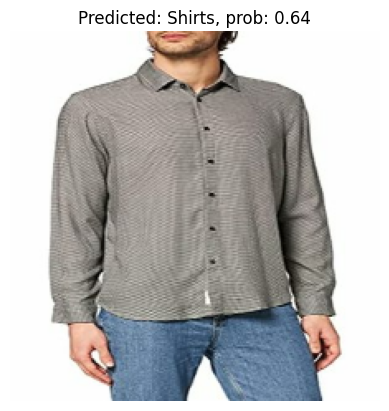

In [96]:
predict_plot('Fotos_prueba/camisa.jpeg', model_3, clothing_types , (224, 224))

In [ ]:
filenames, feature_list = get_features_BBDD('BBDD', model_3, 'model_3')

## Cargamos la lista de características y ficheros

Cargamos la lista de características y ficheros del modelo ganador para poder sacar la recomendación

In [70]:
with open('featurevector_model_3.pkl', 'rb') as f:
    feature_list = pickle.load(f)
with open('filenames_model_3.pkl', 'rb') as f:
    files = pickle.load(f)

### Obtenemos la recomendación

Utilizando la función previamente definida, hemos obtenido una lista de las prendas más similares encontradas por el modelo y aunque la precisión no es perfecta, se puede observar que se acerca bastante a la camisa seleccionada.

1/1 [==============================] - 0s 186ms/step


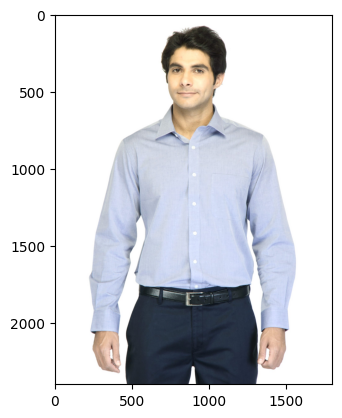

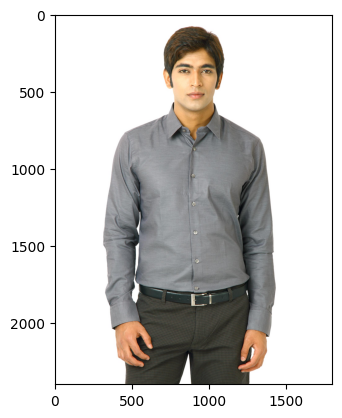

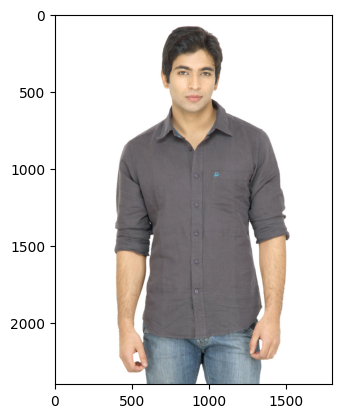

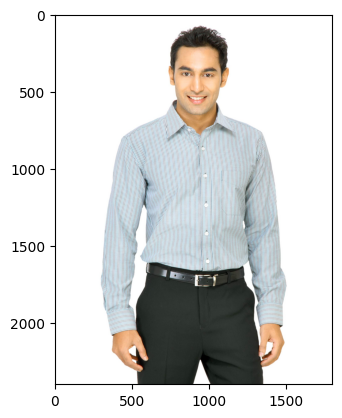

In [94]:
recommendation('Fotos_prueba/camisa.jpeg', model_3, feature_list, files, n_neigh=4)